# Introduction
I'm Wes, an senior on Computer Science. This project I was aiming to learn about OCR applications. Originally I wanted to build something that could extract the data out of advertisements, but as I discovered there were many things which got in the way and with the timetable I had to meet and my setbacks that that just wasn't going to happen. Ultimately, I changed focus to just being able to extract handwritten text. These are my findings are results.

# OCR Using Sklearn, Kaggle, and MNIST
In this notebook I will build a nueral network model using Sklearn and train it to recognize english characters and numbers.

I chose to use Sklearn library because I have some experience with it from my Machine Learning class I am taking this semester. It has many useful tools such as automatic train test splitting as well as the ability to train regression and neural network models.

As far as the datasets go, many websites suggested using these two in combination due that they are both open source and free to use. Kaggle is also easy to work with because it is a single csv file download, and MNIST is a simple python import.

## Relevant Literature

Some of how I began my process came from reading 
<br> <br>
"A New Implementation of Deep Neural Networks for Optical Character Recognition and Face Recognition"
https://www.researchgate.net/publication/324877673_A_New_Implementation_of_Deep_Neural_Networks_for_Optical_Character_Recognition_and_Face_Recognition 
<br> <br>
In it they mention using Kaggle and the MNIST library. They analyze the difference between using Deep Neural Networks (DNN), Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN). The researchers decide on using CNN for their testing procedures as well as a categorical cross-entropy cost function and an Adam optimizer. From this they were able to achieve around a 98% accuracy rate.

## Loading in Datasets
First we need to begin by mounting our drive and defining the location for our recources to get things up and running

In [1]:
import os
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

#Kaggle_Path = os.path.abspath('Downloads/Kaggle.csv')
Kaggle_Path = '/content/drive/My Drive/ITCS-4152-5152-2021-Fall/Colab/group 04 - Image to text/Kaggle.csv'

Mounted at /content/drive


Now let's get the necessary datasets loaded and imported in. We'll be using both  MNIST and Kaggle A-Z to do the imports as they are both open datasets readily available for use. Kaggle will be used to recognize the characters A-Z and MNIST will be used to recognize characters 0-9

Kaggle A-Z: https://www.kaggle.com/ashishguptajiit/handwritten-az <br>
MNIST 0-9: https://keras.io/examples/vision/mnist_convnet/

In [2]:
# import Kaggle
import numpy as np

kaggle_images = []
kaggle_labels = []

for line in open(Kaggle_Path):
  # parse the line
  line = line.split(',')
  image = np.array([int(x) for x in line[1:]])
  
  # update the lists
  kaggle_images.append(image.reshape(28,28))
  kaggle_labels.append(int(line[0]))

kaggle_images = np.array(kaggle_images, dtype="float32")
kaggle_labels = np.array(kaggle_labels, dtype="int")

# we need to peform this step otherwise we will get the labels mixed up
kaggle_labels += 10


In [3]:
# import MNIST
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
mnist_images = np.vstack([train_images, test_images])
mnist_labels = np.hstack([train_labels, test_labels])

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# combine the two sets into one set
images = np.vstack([kaggle_images, mnist_images])
labels = np.hstack([kaggle_labels, mnist_labels])

In [5]:
# import the data
%pylab inline
import glob
from skimage.transform import resize
from skimage import io, color, util

my_handwriting_2 = '/content/drive/My Drive/ITCS-4152-5152-2021-Fall/Colab/group 04 - Image to text/2.JPG'
my_handwriting_z = '/content/drive/My Drive/ITCS-4152-5152-2021-Fall/Colab/group 04 - Image to text/z.jpg'

my_images = []


img = io.imread(my_handwriting_z)
img = color.rgb2gray(img)
img = resize(img, (28,28))
my_images.append(util.invert(img))

my_images = np.array(my_images)

Populating the interactive namespace from numpy and matplotlib


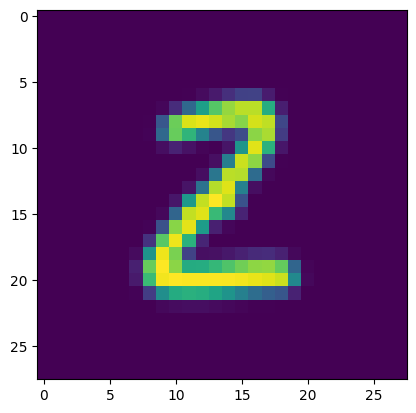

In [6]:
import matplotlib.pyplot as plt
plt.imshow(my_images[0])

Lets take a look at some of our dataset by loading in 30 images to help visualize what we are working with

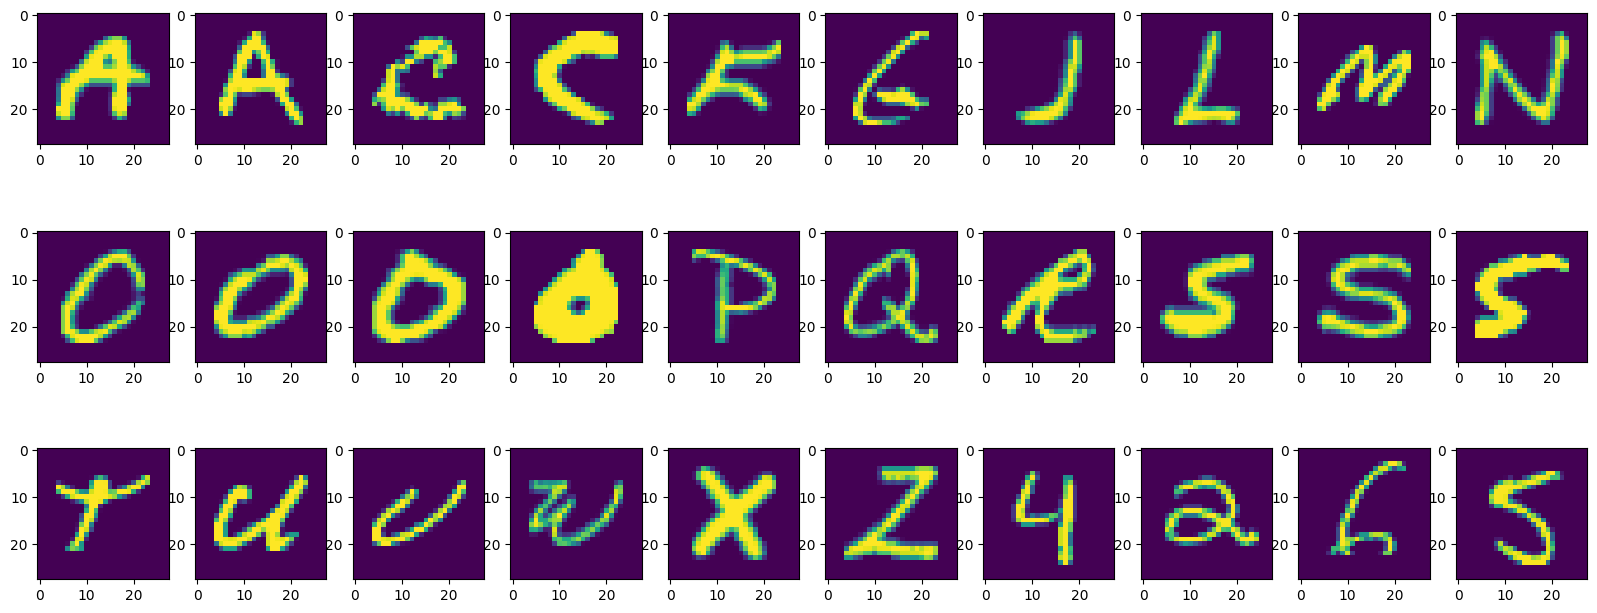

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 10, figsize=(20,8))

temp = len(images) / 30

for i in range(30):
  axs[int(i / 10), i % 10].imshow(images[int(temp) * i])

## Train and Test the NN using SKLearn
Now that we have our data loaded up, we need to begin training the neural network. We will start by importing a few things from sklearn and splitting the data into training and testing datasets.

#### NN Details
Activation - logistic sigmoid function => f(x) = 1 / (1 + exp(-x)) <br>
Architecture - CNN <br>
Batch Size - automatically determined by sklearn <br>
Number of Layers - 28 <br>
Solver - stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba <br>

#### Learning rate
We will be using an adaptive learning rate built into sklearns toolset.  as long as training loss keeps decreasing. Adaptive work so that "*each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.*"

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

# split the data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=.3)

In [9]:
# build the NN
nn = MLPClassifier(hidden_layer_sizes = (28, 28))

In [10]:
# reshape the x data
nsamples, nx, ny = x_test.shape
x_test_resized = x_test.reshape((nsamples,nx*ny))
x_test_normalized = preprocessing.normalize(x_test_resized)

nsamples, nx, ny = x_train.shape
x_train_resized = x_train.reshape((nsamples,nx*ny))
x_train_normalized = preprocessing.normalize(x_train_resized)

In [11]:
# train the NN (this is could take around 25 minutes)
nn.fit(x_train_normalized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(28, 28))

Now we can test the NN and see how accurate our current model is!

In [12]:
nn.score(my_handwriting_normalized, my_handwriting_labels)

NameError: ignored

And lets take a look at the loss function curve. Luckily sklearn also makes this really easy.

0.2081323380703619


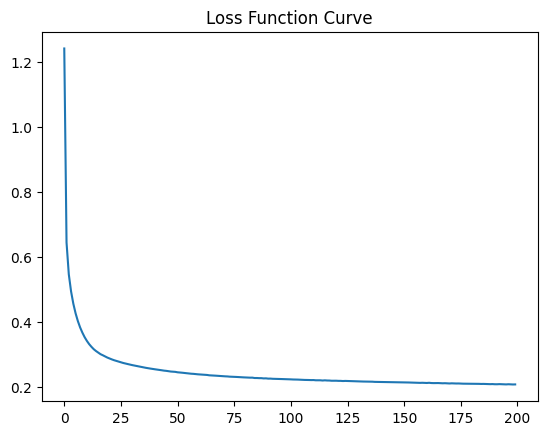

In [13]:
import matplotlib.pyplot as plt

print(nn.loss_)
plt.title('Loss Function Curve')
plt.plot(nn.loss_curve_) 

## Try it on my handwritting

In [14]:
# import the data
%pylab inline
import glob
from skimage.transform import resize
from skimage import io, color, util

my_handwriting_path = '/content/drive/My Drive/ITCS-4152-5152-2021-Fall/Colab/group 04 - Image to text/Wesley Test'
my_files = glob.glob(my_handwriting_path + '/*.JPG')
my_images = []

for file in my_files:
  img = io.imread(file)
  img = color.rgb2gray(img)
  img = resize(img, (28,28))
  my_images.append(util.invert(img))

my_images = np.array(my_images)

nsamples, nx, ny = my_images.shape
my_images_resized = my_images.reshape((nsamples,nx*ny))
my_images_normalized = preprocessing.normalize(my_images_resized)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['resize']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


#### Lets take a look at my images

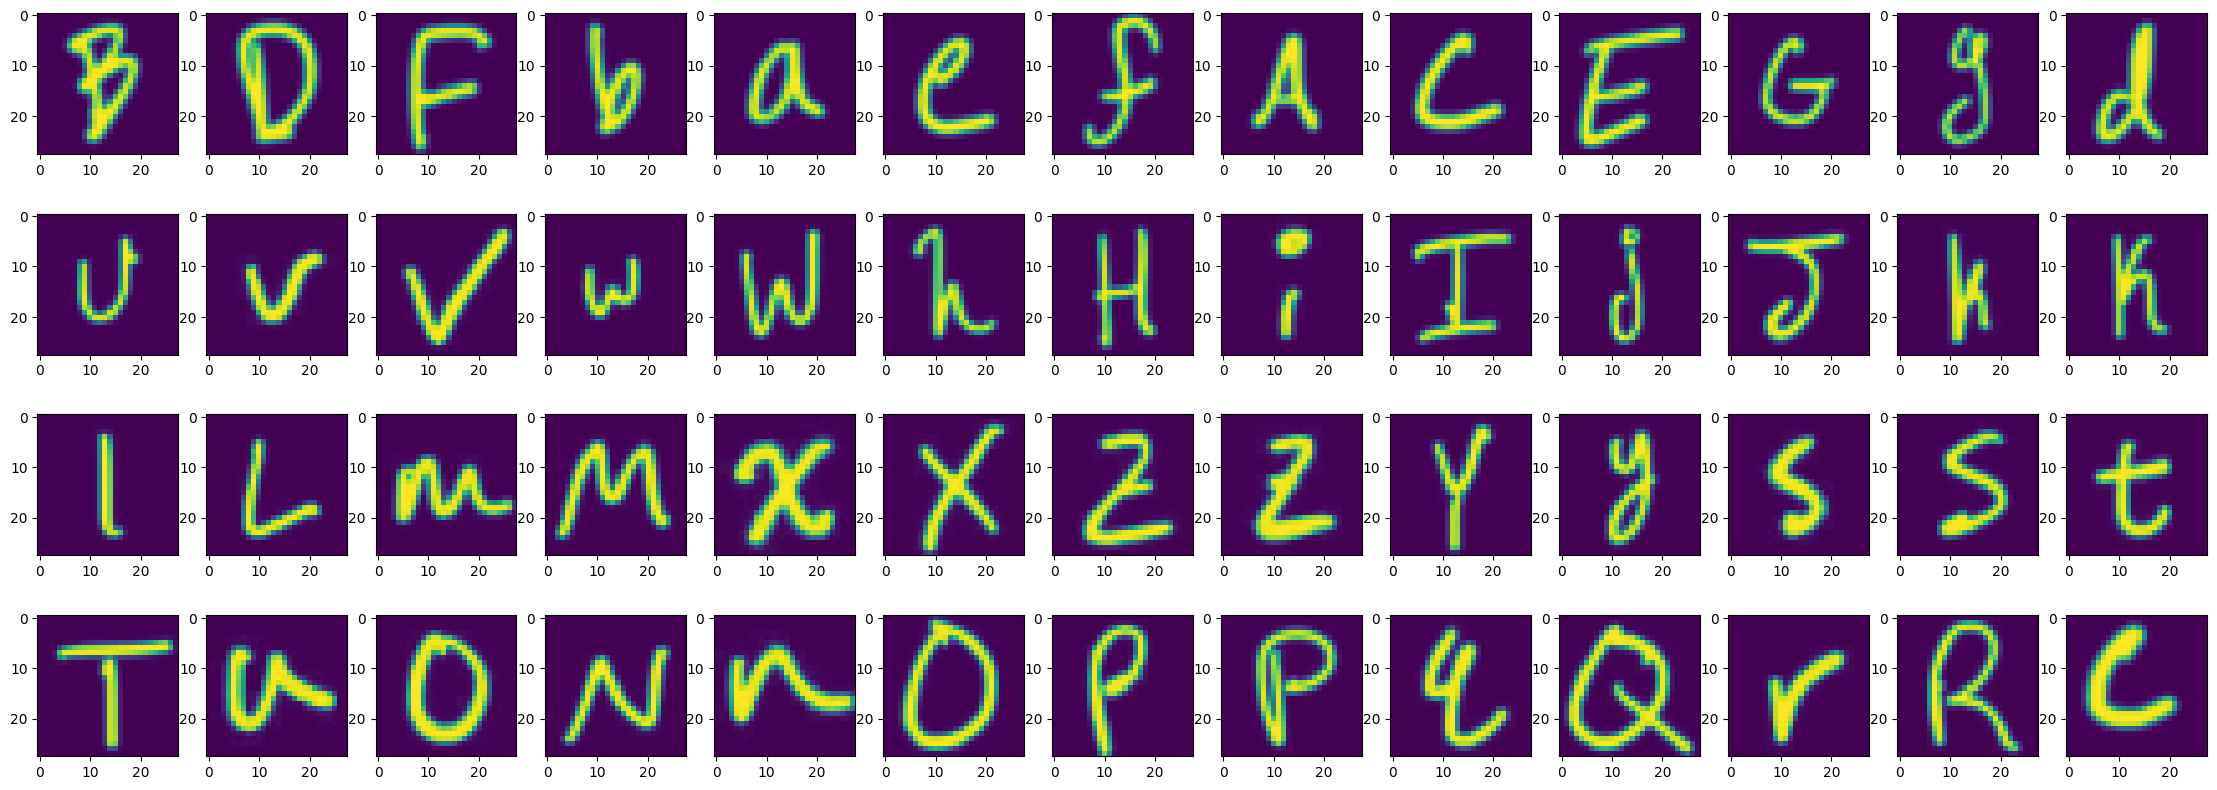

In [18]:
fig, axs = plt.subplots(4, 13, figsize=(28,10))
i = 0
for image in my_images:
  axs[int(i / 13), i % 13].imshow(image)
  i = i + 1

In [19]:
nn.predict(my_images_normalized[49:52])

array([8, 9, 6])

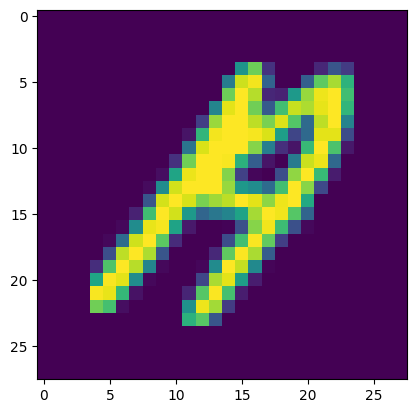

In [20]:
plt.imshow(x_test[1])

In [ ]:
nn.score(my_handwriting_normalized, my_handwriting_labels)